# IBM applied data science capstone project - Car Accident Severity & Prediction

## Introduction/Business Problem 

Seattle is a seaport city on the West Coast of the United States covering a area of 217 km . According letest Census data  Seattle  population stands at 713,700 andis ranked as the 15th-largest in the United States .It is also ranked as the 14th US cities to have the worst traffic by a study in 2019.Seattle residents get around by car, trolley, streetcar, public bus, bicycle, on foot, and by rail. With such bustling streets, it’s no surprise that Seattle sees car accidents every day. It was reported that a crash ouucred every 4.5 minutes in the year 2015.Although the city is taking steps to make the roadways safer for citizens, vehicle collisions are still a serious danger

This project aims to predict the best root of travel that a civilian can take in the city of Seattle with the lowest chance and severity of an accident based on the environmental and traffic data provided by Seattle SPOT Traffic Management Division.

These is done to provide people living in the state of Seattle a safer way to travel and to reduce the overall number of accidents in the state by providing valuable insides and reasons for the cause of accidents. 

## Data

The data set used for this project was provided by Seattle SPOT Traffic Management Division and shared by IBM on Coursera. This data set is updated weekly from 2004 to Present . A total of 194,673 observations and 38 variables are recorded in these data set till date. Each observation is given a SEVERITYCODE that corresponds to the severity of the accident. which will be used as the dependent variable for our model. A detailed list of description for the other attributes can be found in the table below.
<ul>
<li>OBJECTID ESRI unique identifier</li>
<li>SHAPE Geometry ESRI geometry field</li>
<li>INCKEY Long A unique key for the incident</li>
<li>COLDETKEY Long Secondary key for the incident</li>
<li>ADDRTYPE Collision address type: • Alley • Block • Intersection</li>
<li>INTKEY Key that corresponds to the intersection associated with a collision</li>
<li>LOCATION Description of the general location of the collision</li>
<li>EXCEPTRSNCODE</li>
<li>EXCEPTRSNDESC</li>
<li>SEVERITYDESC A detailed description of the severity of the collision</li>
<li>COLLISIONTYPE Collision type</li>
<li>PERSONCOUNT The total number of people involved in the collision</li>
<li>PEDCOUNT The number of pedestrians involved in the collision. This is entered by the state.</li>
<li>PEDCYLCOUNT The number of bicycles involved in the collision. This is entered by the state.</li>
<li>VEHCOUNT The number of vehicles involved in the collision. This is entered by the state.</li>
<li>INJURIES The number of total injuries in the collision. This is entered by the state.</li>
<li>SERIOUSINJURIES The number of serious injuries in the collision. This is entered by the state.</li>
<li>FATALITIES The number of fatalities in the collision. This is entered by the state.</li>
<li>INCDATE The date of the incident.</li>
<li>INCDTTM The date and time of the incident.</li>
<li>JUNCTIONTYPE Category of junction at which collision took place</li>
<li>SDOT_COLCODE A code given to the collision by SDOT.</li>
<li>SDOT_COLDESC A description of the collision corresponding to the collision code.</li>
<li>INATTENTIONIND Whether or not collision was due to inattention. (Y/N)</li>
<li>UNDERINFL Whether or not a driver involved was under the influence of drugs or alcohol.</li>
<li>WEATHER A description of the weather conditions during the time of the collision.</li>
<li>ROADCOND The condition of the road during the collision.</li>
<li>LIGHTCOND The light conditions during the collision.</li>
<li>PEDROWNOTGRNT Whether or not the pedestrian right of way was not granted. (Y/N)</li>
<li>SDOTCOLNUM A number given to the collision by SDOT.</li>
<li>SPEEDING Whether or not speeding was a factor in the collision. (Y/N)</li>
<li>ST_COLCODE A code provided by the state that describes the collision.</li>
<li>ST_COLDESC A description that corresponds to the state’s coding designation.</li>
<li>SEGLANEKEY A key for the lane segment in which the collision occurred.</li>
<li>CROSSWALKKEY A key for the crosswalk at which the collision occurred.</li>
<li>HITPARKEDCAR Whether or not the collision involved hitting a parked car. (Y/N)</li>
    </ul>

Only the variables that describe a cause or effect of accident like WEATHER , ROADCOND , ADDRTYPE and LOCATION are used as independent variable for the predictive model. Other variabels such as SDOTCOLNUM and ST_COLDESC which are of official use and have no direct relation with the causality or effect of an accident are not taken in to account.

An initial analysis of the data will be done to filter out the missing entries which will either be deleted or if possible fitted with middle value.

## Methodology

In [1]:
# libraries used for this project 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

In [2]:
#loding the raw data
data= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Here the the data of each column is checked and the independent variables and the dependent variable is selected. The definition of each column can be found in the metadata file via the following link: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf



After refering the the meta data it is concluded that X, Y, WEATHER, ROADCOND,  LIGHTCOND , SPEEDING and INCDTTM  can be potential independent variables and SEVERITYCODE is the dependent variable.

In [3]:
prepross=data[['SEVERITYCODE', 'X', 'Y','ADDRTYPE','LOCATION', 'WEATHER','ROADCOND', 'LIGHTCOND','SPEEDING']]
prepross['SEVERITYCODE']=prepross['SEVERITYCODE'].astype(str)
prepross.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Raining,Wet,Daylight,NaN


## Exploring the data 

In [4]:
# Filtering of null data 
print(prepross.info())
print('---------------------------------------------')
print(prepross.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEVERITYCODE  194673 non-null  object 
 1   X             189339 non-null  float64
 2   Y             189339 non-null  float64
 3   ADDRTYPE      192747 non-null  object 
 4   LOCATION      191996 non-null  object 
 5   WEATHER       189592 non-null  object 
 6   ROADCOND      189661 non-null  object 
 7   LIGHTCOND     189503 non-null  object 
 8   SPEEDING      9333 non-null    object 
dtypes: float64(2), object(7)
memory usage: 13.4+ MB
None
---------------------------------------------
SEVERITYCODE         0
X                 5334
Y                 5334
ADDRTYPE          1926
LOCATION          2677
WEATHER           5081
ROADCOND          5012
LIGHTCOND         5170
SPEEDING        185340
dtype: int64


In [5]:
prepross.describe(include= object)

,SEVERITYCODE,ADDRTYPE,LOCATION,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,194673,192747,191996,189592,189661,189503,9333
unique,2,3,24102,11,9,9,1
top,1,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,Clear,Dry,Daylight,Y
freq,136485,126926,276,111135,124510,116137,9333


In [6]:
prepross.describe()

,X,Y
count,189339.000000,189339.000000
mean,-122.330518,47.619543
std,0.029976,0.056157
min,-122.419091,47.495573
25%,-122.348673,47.575956
50%,-122.330224,47.615369
75%,-122.311937,47.663664
max,-122.238949,47.734142


It can be seen that the severity of the collision ranges from prop damage (1) to injury (2) <br>
Ref metadata- code corresponding to the severity of the collision:<br>
• 3—fatality<br>
• 2b—serious injury<br>
• 2—injury<br>
• 1—prop damage<br>
• 0—unknown <br>


<ul>
    <li>As it can be seen that there are 185340 Null data out of 194673 in SPEEDING, the column can be droped.</li>
    <li>The Null data for the rows of X and Y will be deleted.</li>
    <li>NULL for WEATHER, LIGHTCOND, ADDRTYPE, LOCATION and ROADCOND will be replaced with max value</li>
    </ul>


In [7]:
# Removing  SPEEDING
prepross.drop(['SPEEDING'], axis =1, inplace = True)

# Removing rows with Null value in X and Y
prepross.dropna(subset=['X','Y'], inplace = True)

# Replacing Null values with most frequent value in WEATHER, LIGHTCOND, LOCATION, ADDRTYPE and ROADCOND 
prepross['WEATHER'].replace(np.nan,'Clear', inplace = True)
prepross['LIGHTCOND'].replace(np.nan,'Daylight', inplace = True)
prepross['ADDRTYPE'].replace(np.nan,'Block', inplace = True)
prepross['ROADCOND'].replace(np.nan,'Dry', inplace = True)
prepross['LOCATION'].replace(np.nan,'BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N ', inplace = True)

In [17]:
traf=prepross[:]
traf.reset_index(drop=True,inplace= True)
traf.head(5)


,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,0,5TH AVE NE AND NE 103RD ST,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Clear,Dry,Daylight
4,2,-122.306426,47.545739,0,SWIFT AVE S AND SWIFT AV OFF RP,Raining,Wet,Daylight


The above data set is properly formated  and all the null values have been removed. I will be using the above data set for data visualisation and analysis.

total NO of accidents with Injury at Intersection =  27718 
total NO of accidents with Injury at Block = 29400 
total NO of accidents with prop-damage at Intersection = 37030 
total NO of accidents with prop-damage at Block = 95191


<IPython.core.display.Javascript object>


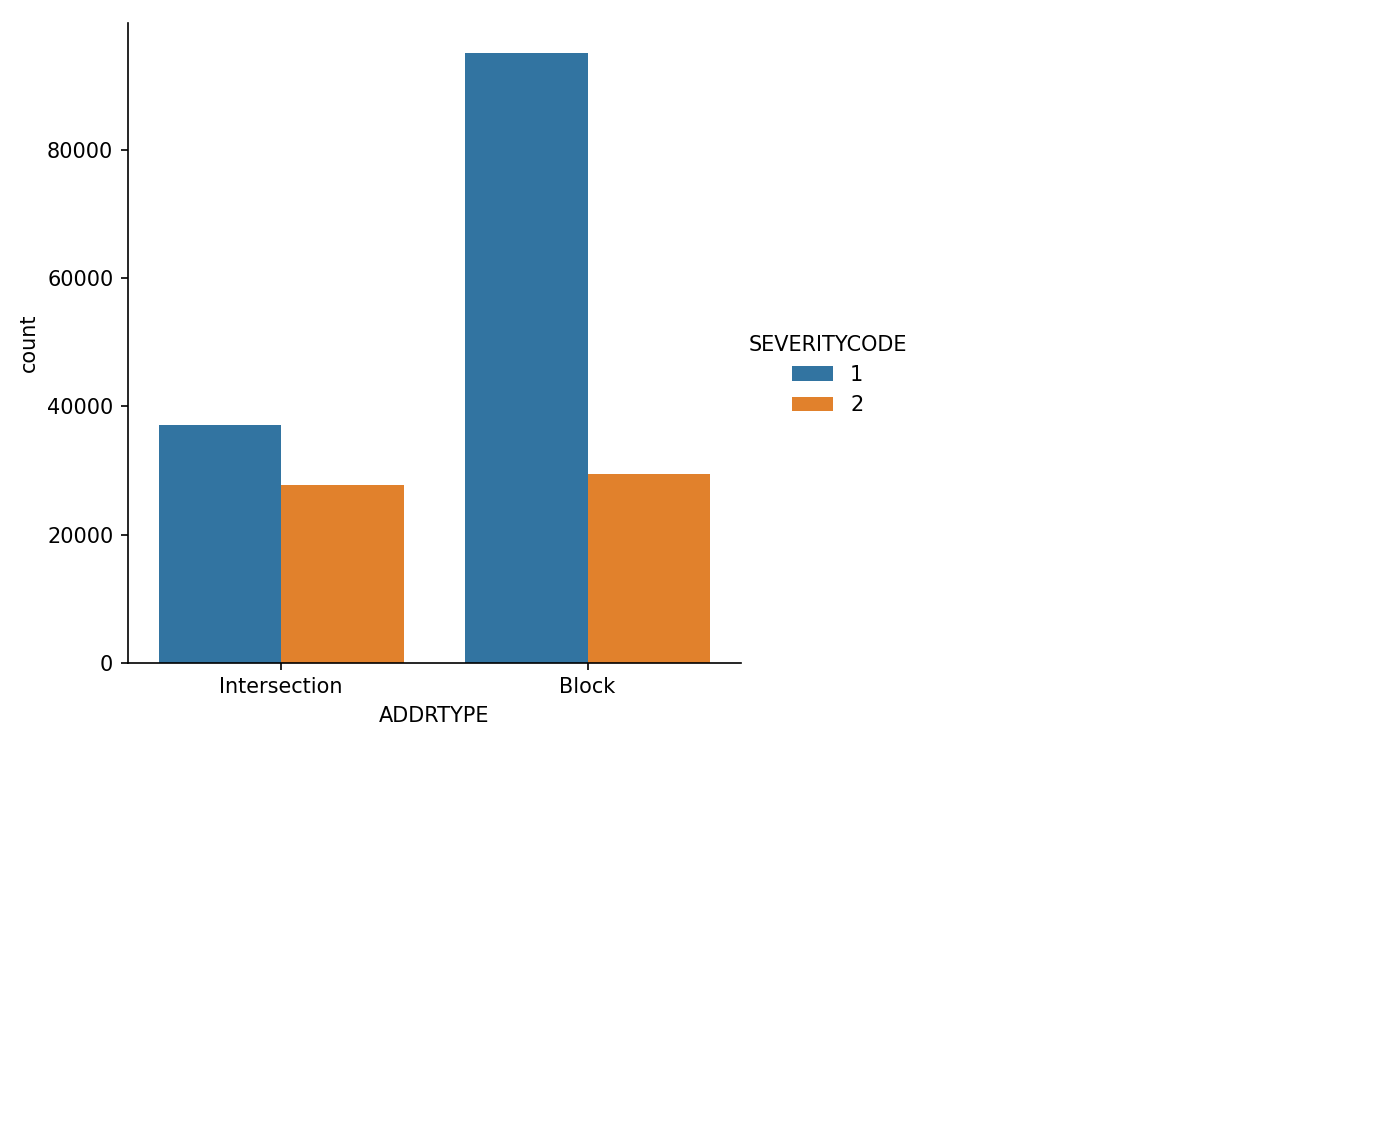

In [9]:
traf['ADDRTYPE'].value_counts()

injury_block= 0
injury_Intersection= 0
prop_damage_block= 0
prop_damage_Intersection= 0
for i in range(0,len(traf)):
    if traf.ADDRTYPE[i]== "Block" and traf.SEVERITYCODE[i] == '2':
        injury_block= injury_block + 1
    elif traf.ADDRTYPE[i] == "Block" and traf.SEVERITYCODE[i]  == '1':
        prop_damage_block= prop_damage_block + 1
    elif traf.ADDRTYPE[i] == "Intersection" and traf.SEVERITYCODE[i]  == '2':
        injury_Intersection= injury_Intersection + 1
    elif traf.ADDRTYPE[i] == "Intersection" and traf.SEVERITYCODE[i]  == '1':
        prop_damage_Intersection= prop_damage_Intersection +1
print('total NO of accidents with Injury at Intersection = ', injury_Intersection,
      '\ntotal NO of accidents with Injury at Block =', injury_block, 
      '\ntotal NO of accidents with prop-damage at Intersection =',prop_damage_Intersection,
     '\ntotal NO of accidents with prop-damage at Block =', prop_damage_block)

sbr.catplot(x='ADDRTYPE',kind='count', hue='SEVERITYCODE', data=traf)

From the above analysis we can see that there is a higher chance of an accident at Block than at the intersection. When looking at the type of accident i.e type 1 and type 2, it can be seen that the probability of a type 2 (Injury) accident is almost same in both Intersection and Block where as it is much likely for a type 1 ( Prop-damage)  accident to occure at Block



<IPython.core.display.Javascript object>


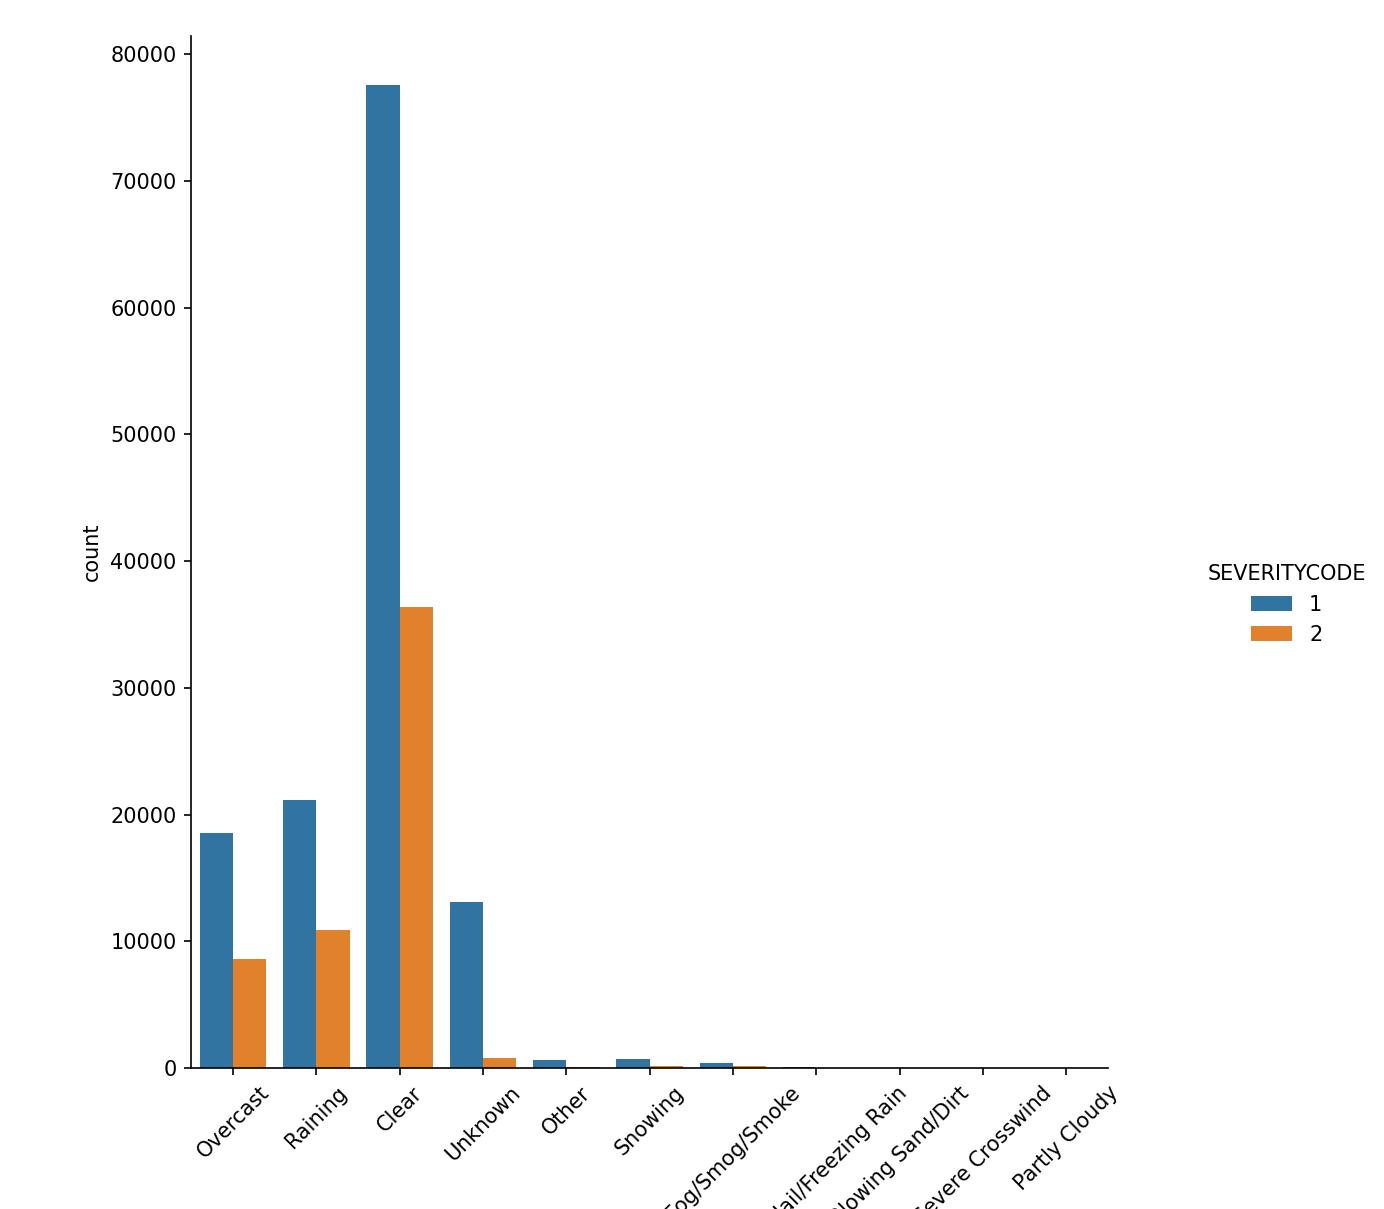

Clear                       113884
Raining                      32015
Overcast                     27136
Unknown                      13893
Snowing                        894
Other                          773
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               50
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [40]:
sbr.catplot(x='WEATHER',kind='count', hue='SEVERITYCODE', data=traf)
plt.xticks(rotation=45)

traf.WEATHER.value_counts()

From the adove data exploration it is clear there is a high probability of an accident on a clear day compayred to any other days. Howeve  looking at the numeric data numeric data we can see that the data is biased towards clear weather, but as wether is very unpredictabel and varies from area to area it might not be a bat idea to use it as a parameter for predicting accidents.

<IPython.core.display.Javascript object>


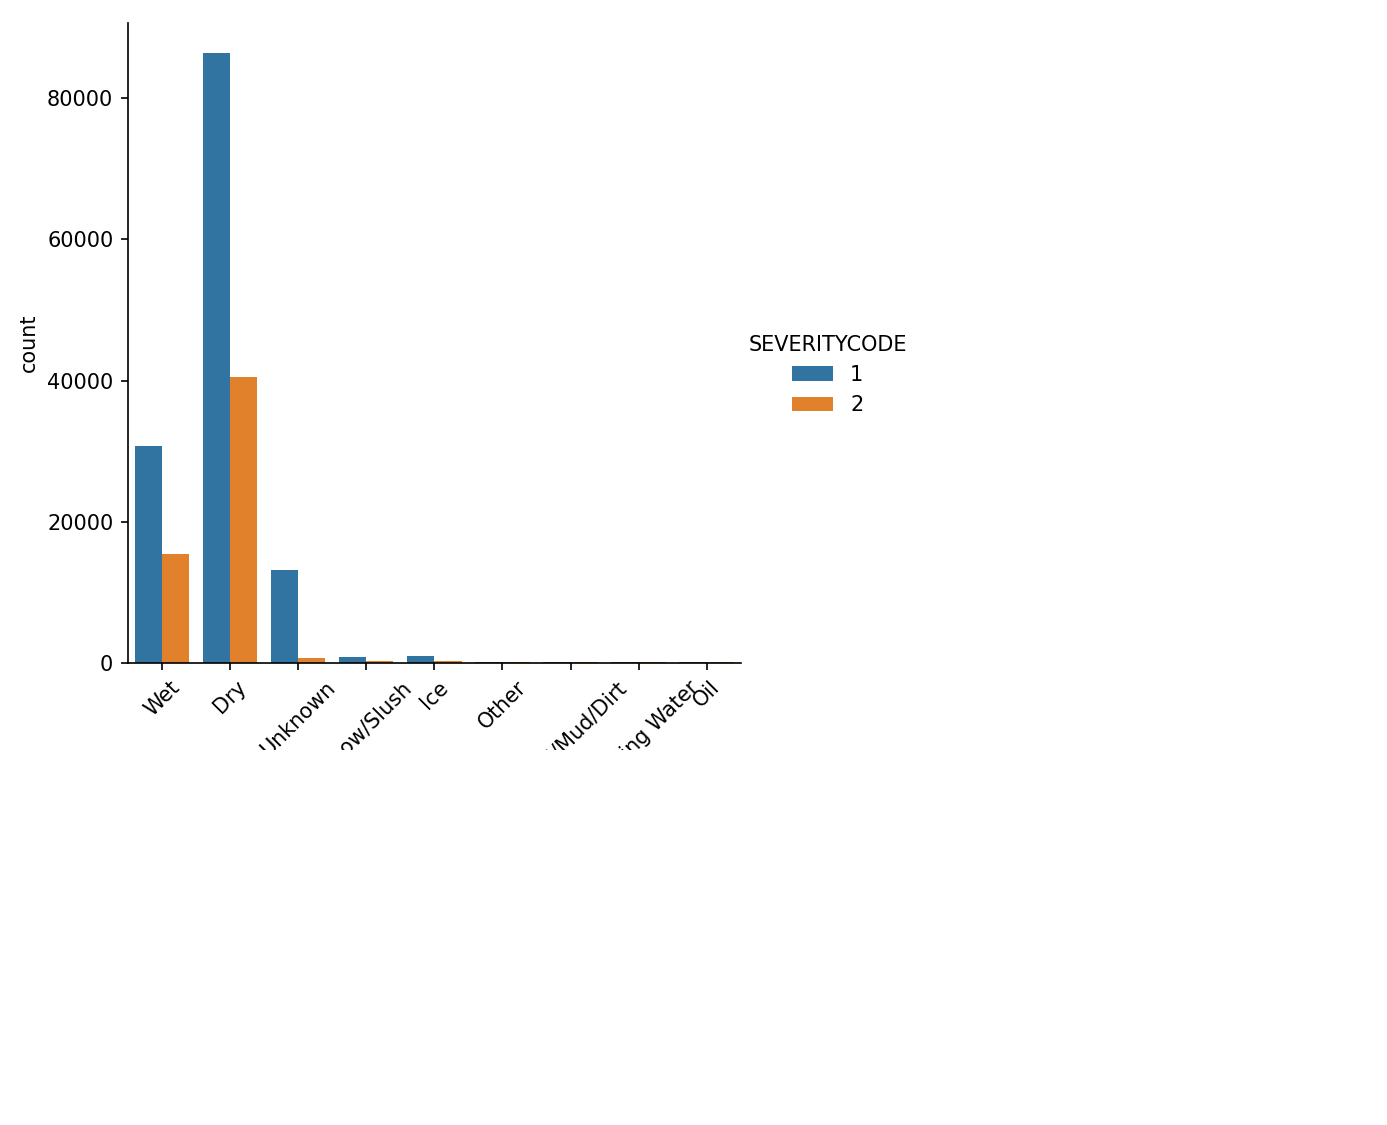

Dry               126934
Wet                46064
Unknown            13839
Ice                 1177
Snow/Slush           989
Other                117
Standing Water       102
Sand/Mud/Dirt         64
Oil                   53
Name: ROADCOND, dtype: int64

In [41]:
sbr.catplot(x='ROADCOND',kind='count', hue='SEVERITYCODE', data=traf)
plt.xticks(rotation=45)

traf.ROADCOND.value_counts()

Again we can see that the road condition dosent effect the type of accident but it is far more likely for an accident to occure in a dry road.However there is a significant number of accidents that are caused by unknown condition, Which will be needed to be ignored during prediction.

<IPython.core.display.Javascript object>


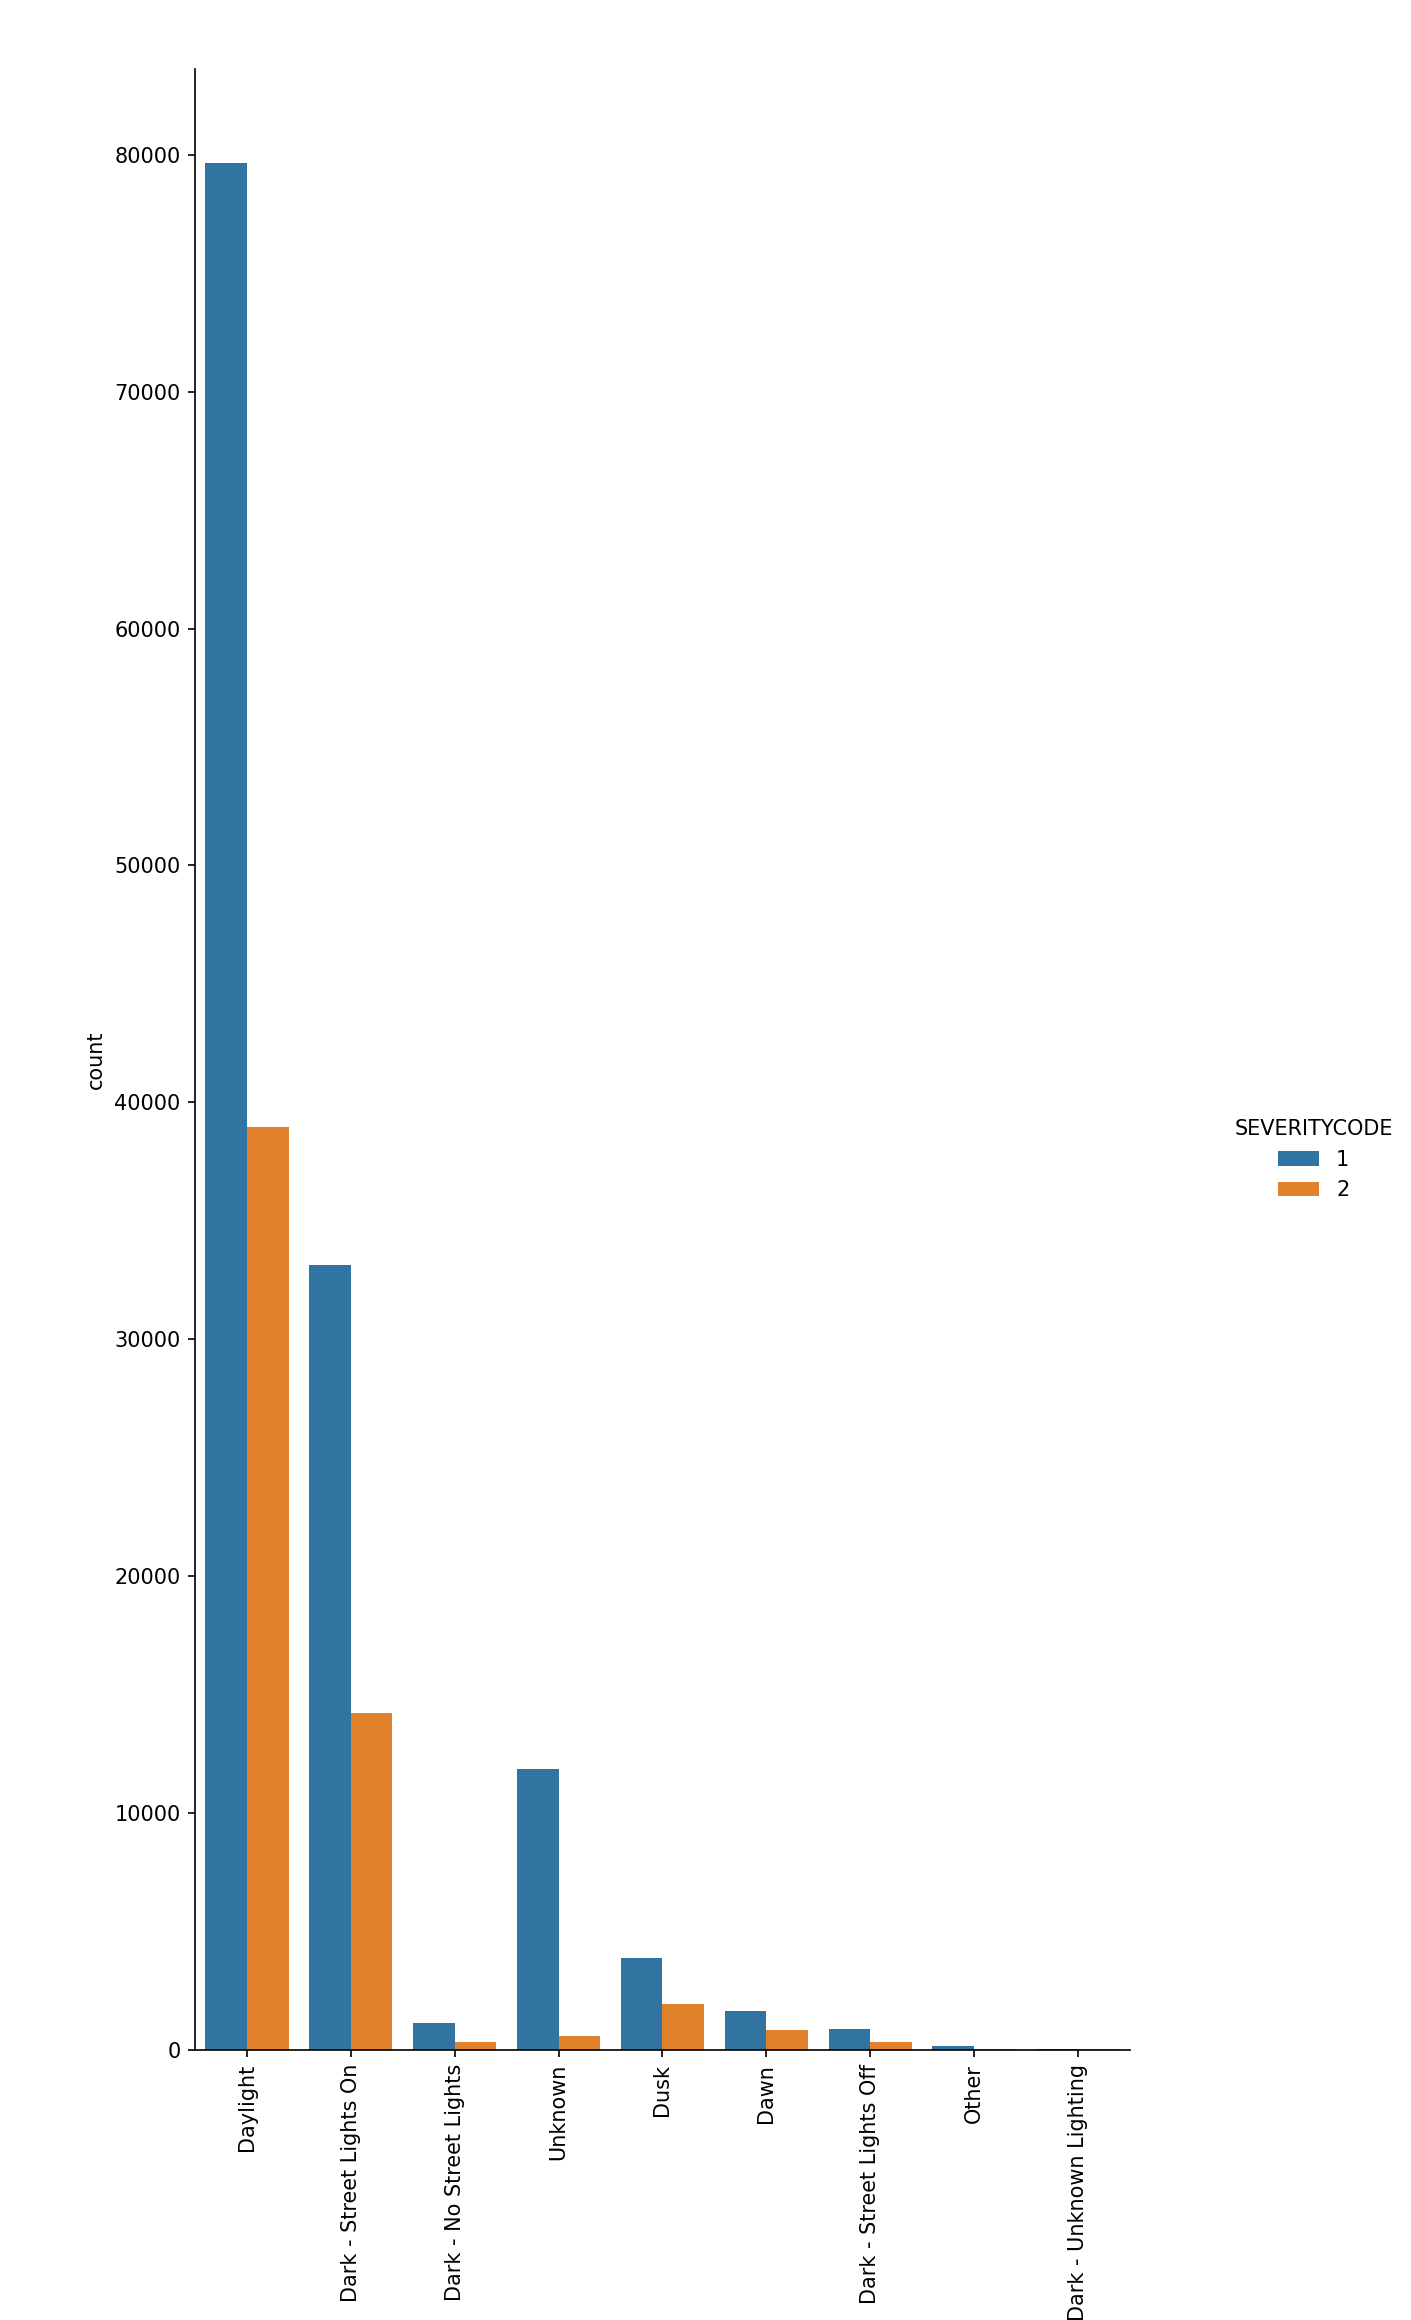

Daylight                    118594
Dark - Street Lights On      47314
Unknown                      12432
Dusk                          5775
Dawn                          2422
Dark - No Street Lights       1451
Dark - Street Lights Off      1152
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [42]:
sbr.catplot(x='LIGHTCOND',kind='count', hue='SEVERITYCODE', data=traf)
plt.xticks(rotation=90)

traf.LIGHTCOND.value_counts()

It is clear from the above plot that most accidents take place during the day or with some lighting. As it can be seen that having street lights off can reduce the chance of an accident. However there is a significant number of accidents that are caused by unknown condition, Which will be needed to be ignored during prediction.

I used folium to visualize the places where accidents have occured. I have used circular markers of red and blue color to identify the type of accidents.

In [20]:
sample=traf[0:4000]

import folium
seattl = folium.Map(location=[47.6062, -122.3321],
                      zoom_start=12)
for i in range(0,len(sample)):
    if sample.SEVERITYCODE[i] == 2 :
        folium.CircleMarker(
        location=[sample.Y[i],sample.X[i]],
        radius=2,
        color='red',
        fill=True,fill_color='red').add_to(seattl)
    if sample.SEVERITYCODE[i] == 1 :
        folium.CircleMarker(
        location=[sample.Y[i],sample.X[i]],
        radius=2,
        color='blue',
        fill=True,fill_color='blue').add_to(seattl)
seattl

From the above map it can be seen that the accidents occure in cluster. Some areas have more chance of having an accidents than others. One can see that at the center of Seattle the mejority of accidents have taken place till date. To extract more details LOCATION detales are looket into to find insites in the cause of accidents.

In [39]:
loc=traf.LOCATION.value_counts().to_frame()
loc.head(500)

,LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,254
6TH AVE AND JAMES ST,252
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,239
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,231
...,...
7TH AVE AND VIRGINIA ST,50
35TH AVE SW AND SW JUNEAU ST,50
14TH AVE AND E JEFFERSON ST,50
1ST AVE BETWEEN BATTERY ST AND WALL ST,50


In [81]:
loc2=traf.LOCATION[traf.SEVERITYCODE=="2"].to_frame()
#traf.LOCATION[traf.SEVERITYCODE].value_counts().to_frame()
loc2.LOCATION.value_counts().to_frame()

,LOCATION
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,120
6TH AVE AND JAMES ST,107
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,94
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,94
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,88
...,...
37TH AVE SW BETWEEN SW MANNING ST AND SW CHARLESTOWN E ST,1
26TH AVE NW BETWEEN NW 70TH ST AND NW 73RD ST,1
NW 63RD ST BETWEEN 11TH AVE NW AND 14TH AVE NW,1
37TH AVE NE BETWEEN NE 125TH ST AND NE 130TH ST,1


In [82]:
loc1=traf.LOCATION[traf.SEVERITYCODE=="1"].to_frame()
#traf.LOCATION[traf.SEVERITYCODE].value_counts().to_frame()
loc1.LOCATION.value_counts().to_frame()

,LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,171
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,151
6TH AVE AND JAMES ST,145
1ST AVE BETWEEN BLANCHARD ST AND BELL ST,140
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,137
...,...
N 91ST ST BETWEEN LINDEN AVE N AND AURORA AVE N,1
NW 97TH ST BETWEEN 2ND AVE NW AND 3RD AVE NW,1
37TH AVE BETWEEN E SPRING ST AND E UNION ST,1
NORTH PARK AVE N BETWEEN N 109TH ST AND N 110TH ST,1


By looking at the location data, it can be seen that some areas have higher no of accidents compaired to others. <i>N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N	</i> has the highest number of accidents till date. One can also that the type of accident depends on the  LOCATION, for example there are more numbers of type 1 (171)accidents in <i>N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N	</i> than type 2 (94)

From observing and analysing the above data i have come to the conclusion that the main variabel  determining the type of accident is LOCATION and ADDRTYPE. Where as for the prediction of an accident can be done by combining LOCATION and ADDRTYPE with WEATHER	ROADCOND and LIGHTCOND.

K Nearest Neighbor(KNN) and Decision Tree are the best choices for making a predictive model.

## MODEL

In [18]:
traf['ADDRTYPE'].replace(to_replace=['Intersection', 'Block'], value=[0,1],inplace=True)
traf.head()

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,0,5TH AVE NE AND NE 103RD ST,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Clear,Dry,Daylight
4,2,-122.306426,47.545739,0,SWIFT AVE S AND SWIFT AV OFF RP,Raining,Wet,Daylight


In [12]:
# catagorical to dummy var


Feature = traf[['X', 'Y','ADDRTYPE']]
Feature = pd.concat([Feature,pd.get_dummies(traf['LOCATION'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(traf['WEATHER'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature = pd.concat([Feature,pd.get_dummies(traf['ROADCOND'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature = pd.concat([Feature,pd.get_dummies(traf['LIGHTCOND'])], axis=1)
Feature.drop(['Unknown'], axis = 1,inplace=True)
Feature.head()


,X,Y,ADDRTYPE,10TH AVE AND E ALDER ST,10TH AVE AND E JEFFERSON ST,10TH AVE AND E MADISON ST,10TH AVE AND E PIKE ST,10TH AVE AND E PINE ST,10TH AVE AND E SENECA ST,10TH AVE AND E SPRUCE ST,...,YESLER WAY BETWEEN ALASKAN E RDWY WAY AND WESTERN AVE,YESLER WAY BETWEEN ALASKAN WAY AND ALASKAN E RDWY WAY,YESLER WAY BETWEEN JAMES ST AND OCCIDENTAL AVE S,YESLER WAY BETWEEN OCCIDENTAL AVE S AND 2ND AVE,YESLER WAY BETWEEN POST AVE AND 1ST AVE,YESLER WAY BETWEEN TERRACE ST AND 6TH AVE,YESLER WAY BETWEEN WESTERN AVE AND POST AVE,YORK RD S BETWEEN 36TH AVE S AND 37TH AVE S,YORK RD S BETWEEN S HORTON ST AND 36TH AVE S,YUKON AVE S AND S HENDERSON ST
0,-122.323148,47.703140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-122.347294,47.647172,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-122.334540,47.607871,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-122.334803,47.604803,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-122.306426,47.545739,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X=Feature
Y=traf['SEVERITYCODE']

In [ ]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
#K Nearest Neighbor(KNN)

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

K=10
arr= np.arange(1,K)
mean_acc = np.zeros(K-1)

for i in arr:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,  y_train)
    yhat=neigh.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
print(mean_acc)
plt.plot(arr,mean_acc)

In [ ]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6).fit(X_train,  y_train)
yHatTree = dTree.predict(X_test)
metrics.accuracy_score(y_test, yHatTree)

## Result 

In this project it was observed that the type of accident or the severity of an accident in the city of Seattel is highly dependent on specific locations and address types such as intersections and blocks. Using the findings of this project I beleave that there can be a segnificant reduction in accidents. It was also seen that the chance of an accident depends on factors like weather, road conditions and lighting. What is suprising is that it is accidents are far more likely to happen in normal conditions like clear sky, dry road and during day time. It can also be seen that ther were a significant reduction in accidents in no light conditions. The city authority can make use of this findings to better the trafic in the city.


## Conclusion

In conclusion I hope that this findings will help civilians deside beter roots of commute and reduce there chance of getting into an accident. 